
# Example notebook

This example will contain the following examples
- Creating and saving a graph 
- Plotting the graph 
- Executing a node
- Loading a graph from disk

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from importlib import reload
import os
import autodepgraph as adg
# from autodepgraph.graph import Graph
import autodepgraph.graph_v2 as g
reload(g)

from autodepgraph.graph_v2 import AutoDepGraph_DAG


## Creatinga custom graph
A graph can be instantiated

In [2]:
cal_True_delayed=  'autodepgraph.node_functions.calibration_functions.test_calibration_True_delayed'
test_graph = AutoDepGraph_DAG('test graph')
for node in ['A', 'B', 'C', 'D', 'E']:
    test_graph.add_node(node, calibrate_function=cal_True_delayed)

Some nodes require other nodes to be in a `good` or calibrated state. Such dependencies are defined by setting edges in the graph. 

In [3]:
test_graph.add_edge('C', 'A')
test_graph.add_edge('C', 'B')
test_graph.add_edge('B', 'A')
test_graph.add_edge('D', 'A')
test_graph.add_edge('E', 'D')

In [4]:
test_graph.nodes()['C']['state']

'unknown'

In [5]:
test_graph.cfg_svg_filename

'/Users/Adriaan/GitHubRepos/DiCarloLab_Repositories/AutoDepGraph/autodepgraph/svg_viewer/adg_graph.svg'

In [6]:
test_graph.maintain_node('C', verbose=True)


Maintaining node "C".
	Checking node C.
	Node C needs calibration.
	Calibrating node C.
	Calibration of node C successful.


'good'

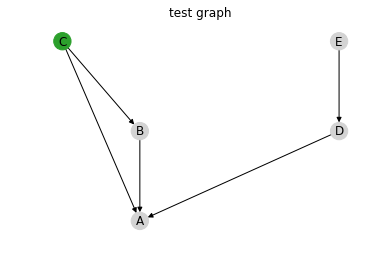

In [7]:
test_graph.draw_mpl()

In [8]:
test_graph.set_all_node_states('unknown')

In [9]:
test_graph.maintain_B()

Maintaining node "B".
	Checking node B.
	Node B needs calibration.
	Calibrating node B.
	Calibration of node B successful.


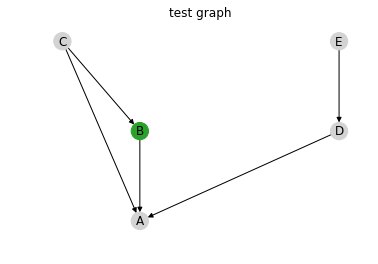

In [10]:
test_graph.draw_mpl()

In [11]:
# Update the plotting monitor (default matplotlib) to show your graph
test_graph.update_monitor()

In [12]:
test_graph.set_all_node_states('needs calibration')

In [13]:
test_graph.maintain_node('E')

Maintaining node "E".
Maintaining node "D".
Maintaining node "A".
	Calibrating node A.
	Calibration of node A successful.
	Calibrating node D.
	Calibration of node D successful.
	Calibrating node E.
	Calibration of node E successful.


'good'

### Three qubit example

This example shows a bit more realistic graph. 

In [14]:
test_dir = os.path.join(adg.__path__[0], 'tests', 'test_data')
fn = os.path.join(test_dir, 'three_qubit_graph.yaml')
DAG = nx.readwrite.read_yaml(fn)


### Reset the state of all nodes

In [15]:
DAG.node['CZ q0-q1']

{'calibrate_function': 'autodepgraph.node_functions.calibration_functions.test_calibration_True',
 'check_function': 'autodepgraph.node_functions.check_functions.return_fixed_value',
 'color': '#D3D3D3',
 'fillcolor': '#D3D3D3',
 'fixedsize': 'false',
 'last_update': datetime.datetime(2018, 3, 17, 23, 44, 29, 972265),
 'shape': 'ellipse',
 'state': 'unknown',
 'style': 'filled',
 'timeout': inf,
 'tolerance': 0}

In [33]:
DAG.set_all_node_states('needs calibration')
# DAG.set_all_node_states('unknown')
DAG.update_monitor()

In [18]:
DAG._construct_maintenance_methods(DAG.nodes.keys())

In [34]:
DAG.maintain_CZ_q0_q1()

Maintaining node "CZ q0-q1".
Maintaining node "Chevron q0-q1".
Maintaining node "3 qubit device multiplexed readout".
Maintaining node "q0 optimal weights".
Maintaining node "q0 pulse amplitude med".
Maintaining node "q0 frequency fine".
Maintaining node "q0 pulse amplitude coarse".
Maintaining node "AWG8 MW-staircase".
	Calibrating node AWG8 MW-staircase.
	Calibration of node AWG8 MW-staircase successful.
Maintaining node "q0 frequency coarse".
Maintaining node "q0 resonator frequency".
Maintaining node "3 qubit device resonator frequencies coarse".
	Calibrating node 3 qubit device resonator frequencies coarse.
	Calibration of node 3 qubit device resonator frequencies coarse successful.
	Calibrating node q0 resonator frequency.
	Calibration of node q0 resonator frequency successful.
	Calibrating node q0 frequency coarse.
	Calibration of node q0 frequency coarse successful.
Maintaining node "q0 mixer offsets drive".
	Calibrating node q0 mixer offsets drive.
	Calibration of node q0 mixe

In [37]:
DAG.maintain_node('CZ q0-q1')

Maintaining node "CZ q0-q1".
	Checking node CZ q0-q1.
	Node CZ q0-q1 needs calibration.
	Calibrating node CZ q0-q1.
	Calibration of node CZ q0-q1 successful.


'good'